# ACSE-7 (Optimisation & Inversion) <a class="tocSkip"></a>

## Coursework part B <a class="tocSkip"></a>

Part B of the coursework covers lectures 2-7. The completion time should be roughly that of part A and part C combined.

<font size="1pt">Some $\LaTeX$ definitions hidden in this cell (double-click to reveal)</font>
$
\newcommand\vec[1]{\boldsymbol{\mathrm{#1}}}
\newcommand\mat[1]{\underline{\mathbf{#1}}}
\newcommand\R{\mathbb{R}}
\newcommand\vlam{\boldsymbol{\lambda}}
$

In [1]:
# needs to be in separate cell!
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# scipy's optimization
import scipy.optimize as sop
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spl

# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## From Poisson to Diffusion Equation <a class="tocSkip"/></a>

In the lectures, we have used a finite difference discretisation of Poisson's equation in two dimensions:

$$
  -\frac{\partial^2 u(x,y)}{\partial x^2} - \frac{\partial^2 u(x,y)}{\partial y^2} = f(x,y)
$$

with a Finite Difference discretisation given by:


$$ \frac{-u_{i-1} + 2u_{i} -u_{i+1}}{\Delta x^2} + \frac{-u_{i-N_x} + 2u_{i} - u_{i+N_x}}{\Delta y^2} = f_i $$

where we assume a computational grid of $N_y$ rows and $N_x$ columns, giving $n=N_x\cdot N_y$ grid points. The grid values $u_i$ are numbered row by row. The values $u_{i-1}$ and $u_{i+1}$ refer to the values to the left and right of $u_i$ respectively, whereas $u_{i-N_x}$ and $u_{i+N_x}$ refer to value in the row above and below. We will assume $\Delta y=\Delta x$. In matrix form we may write

$$
  \mat K \vec u = \vec f
$$

with for each row $i$ associated with a grid point in the interior (away from the boundary):

$$
  K_{i,i} = \frac{4}{\Delta x^2}, \text{ and }
  K_{i,i-N_x} = K_{i,i-1} = K_{i,i+1} = K_{i,i+N_x} = -\frac 1{\Delta x^2}
$$

For the boundary rows, we imposed Dirichlet boundary conditions, and we stated, without proof, that the resulting matrix is Symmetric Positive Definite.

# Question B1

* What is your recommendation for a Krylov Subspace method to solve this linear system. Describe in one or two sentences why this method requires the matrix to be SPD.

***

### Answer B1

Conjugate Gradient

we need to ensure the gradient of the quadratic form has the unique minimun solution, so the matrix must be SPD.

# Question B2


Note that for the rows associated with interior points, we have

$$
  \sum_{j=1}^n K_{ij} = 0
$$

i.e. the sum of the entries in each interior row is zero. If we apply Neumann (instead of Dirichlet) boundary conditions, the same is true for all rows: both boundary and interior rows sum to zero.

* Is the matrix with Neumann boundary condition still Symmetric Positive Definite? **Hint:** consider a vector $\vec v$ whose values are all the same: $v_i=C$ for all $i$ with some constant $C$, and compute $\vec v^T\mat K\vec v$. Assuming the matrix is symmetric, and that for all other vectors $\vec v$ we still have $\vec v^T\mat K\vec v\gt 0$, what other term *does* apply to this matrix?

***

### Answer B2

From matrix theory, we know that:

$$
\vec v^T\mat K\vec v = Tr(\mat K \vec v \vec v^T)
$$

where $Tr()$ means the trace of matrix.

for $\vec v \vec v^T$, all the elements $in \vec v$ are $C$, we get that $\vec v \vec v^T$ is a matrix with all elements are $C^2$, which is denoted by $\mat V$.

Now, we denote row of $\mat K$ by $\mat K_i$ and column of $\mat V$ by $\mat V_j$. We know the RHS euation is the trace of dot product of $\mat K$ and $\mat V$. So RHS equal to sum of all rows of $\mat K$ multiply corresponding columns of $\mat V$.

$$
Tr(\mat K \vec v \vec v^T) = \sum_{k=1}^n \mat K_k · \mat V_k
$$

For interior points in $\mat K$, we know:

$$
 \sum_{j=1}^n K_{ij} = 0
$$

with all the elements are same in $\mat V$. So the output produced from interior points is $0$.

$$
Tr(\mat K \vec v \vec v^T) = \sum_{i=1}^n \sum_{j=1}^n K_{ij} * C^2 = 0
$$

From the definetion of semi-positive-definite matrix, we know $\mat K$ is a semi-positive-definite matrix

# Question B3


By adding a time derivative, we can turn this PDE into the diffusion equation

$$
  \frac{\partial u(x,y,t)}{\partial t} - m \frac{\partial^2 u(x,y,t)}{\partial x^2} - m\frac{\partial^2 u(x,y,t)}{\partial y^2} = 0
$$

with diffusion coefficient $m$.

With an implicit time integration (backward Euler) the discrete equation looks like:
    
$$ 
\frac{u_i^{k+1} - u_i^k}{\Delta t} +
m\frac{-u_{i-1}^{k+1} + 2u_{i}^{k+1} -u_{i+1}^{k+1}}{\Delta x^2} + m\frac{-u_{i-N_x}^{k+1} + 2u_{i}^{k+1} - u_{i+N_x}^{k+1}}{\Delta y^2} = 0 $$

where the superscript ${}^{k+1}$ refers to the solution at the end of the timestep, and ${}^k$ to the value at the beginning of the timestep.

After multiplying all terms with $\Delta t$, we can write this discretisation as a linear system

$$
  \mat A \vec u^{k+1} = \vec u^k
$$

where the matrix $\mat A$ is given by

$$
  \mat A = \mat I + m~\Delta t~\mat K
$$

with identity matrix $\mat I$, and $\mat K$ the same matrix as we used for Poisson's equation above with Neumann conditions.

* Using what you already know about $\mat K$, proof that $\mat A$ is Symmetric Positive Definite.

***

### Answer B3

we know that $I$ is SPD matrix, $K$ is symmetrix semi-positive-definite matrix. Meanwhile, $m$ and $\Delta t$ are positive, so $m~\Delta t~\mat K$ is also SPD matrix.

axiom：

If $S$ and $T$ are symmetric positive definite, so is $S + T$.

we start from
$$
\vec v~A\vec v^T = \vec v(\mat I + m~\Delta t~\mat K)\vec v^T
$$
$$
\vec v~Av^T=\vec vI\vec v^T + \vec v(m~\Delta t~\mat K)\vec v^T
$$

for I and $m~\Delta t~\mat K$ are also SPD matrix, we get

$$\vec vI\vec v^T > 0, v(m~\Delta t~\mat K)v^T = 0$$

for all $v \neq 0$

so we get $\vec v~A\vec v^T > 0$ for all $v \neq 0$, which means $~A$ is positive definite matrix.

because $I$ and $K$ are symmetric matrix, so $~A$ is also symmetrix matrix.

From above all, we get $~A$ is a SPD matrix

# Question B4

* We consider the use of dense vs. sparse matrices in solving this system. We use the Conjugate Gradient method to solve the linear system above on a series of computational grids where we increase the resolution and thus the number of grid points $n=N_x\cdot N_y$. We record the average time the CG method takes to perform a single iteration with the results displayed in the graph below. Describe the difference in terms of scaling for the case with dense matrices and the case with sparse matrices, and explain the reason why these differences can be observed. You only need to describe the asymptotic behaviour.

### Answer B4

difference:

the slope of dense matrix is 2 and that of sparse matrix is 1. It means in one iteration, the complexity of dense matrix is $O(n^2)$ operation and complexity of sparse matrix is $O(n)$ operation.

reason:

the difference is produced from the operation in matrix-vector multiplication.

for dense matrix, it need to do operation for $n*n(matrix)*n(vector)$, so the complexity is $O(n^2)$.

but for sparse matrix(band matrix), it just need to do operation for $b*n(matrix)*n(vector)$, where $b$ is the number of diagonal that are non-zero, so the complexity is $O(b * n)$. Because $b$ is a small number compared to $n$, so we can igonre it in $O$, so we finally get complexity $O(n)$

<img src='graph1.png'></img>

***

# Question B5

* As a stopping criterion we use a relative tolerance $\epsilon_{\text{rel}}=10^{-5}$. In the next two figures, we show the overall time for the Conjugate Gradient algorithm to converge with that criterion, and the number of iterations it takes. Only the results with a sparse matrix are shown. Again describe and explain the asymptotic behaviour of both graphs. You do not need to explain the specific value of the~ slope of 0.5 in the right-hand figure. Given that we can observe a slope of 0.5 however, what is your expectation of the scaling between the condition number of the matrix and $n$?

### Answer B5

we're using sparse matrices, so that the cost of each iteration is $O(n)$.

the number of required iterations:

\begin{align*}
i &\leq \tfrac 12 \sqrt{\kappa(\mat A)} \ln \tfrac 2\epsilon & \text{ for Conjugate Gradient}
\end{align*}

where $\kappa(\mat A) = \lambda_{\text max}/\lambda_{\text min}$ is the condition number of the matrix: the ratio of the largest and smallest eigenvalue.

this means that the cost of the entire algorithm can now be classified as $O(\sqrt{\kappa} n)$ 

assuming $\Delta x=\Delta y$, in our problem $\Delta x=L/N_x$, we get $\kappa(\mat A)\propto N_x^2=n$. So the number of iteration is linear with $\sqrt{n}$, which explain the right figure.

Above all, the combined complexities for the Conjugate Gradient algorithm is $O(n^{3/2})$, which explain left figure.

<img src="graph2.png"></img>

***

# Question B6

* We also measured the computational time for solving the linear system with a sparse direct method (not shown). We notice that the scaling of the computational time with the problem size $n$ was worse that linear. Explain why this is to be expected. Do you expect the scaling to be better, the same, or even worse when solving the same equation in three dimensions? Explain why.

***

### Answer B6

The performance of direct methods however can also be improved by taking the sparsity of the matrix into account but this is less straightforward. Initially the work is greatly reduced; for instance in the `Gaussian_elimination_upper` routine we still have an outer loop over all rows, but for each of these we only need to subtract it from rows below that have a corresponding nonzero column entry. Each row operation on its own is initially much cheaper as well as there are only a limited number of entries to work on. After some operations however, the matrix will acquire new nonzero entries (these are called <a class="definition" href="#definitions" id="fillin">fill-in</a>) and slowly the matrix starts becoming dense so that the cost converges to that for dense matrices.


<div class="optional">
As we can see the fill-in occurs between the initially furthest apart non-zero entries: $L_{ij}\neq 0$ for all $i-N_x\leq j\leq i$ and $U_{ij}\neq 0$ for all $i\leq j\leq i+N_x$. This means that the cost of the LU decomposition itself is roughly $O(n \times N_x \times N_x)=O(n^2)$. Once we have obtained the LU decomposition however it becomes cheaper to apply the inverse to multiple right-hand sides, i.e. solve $\mat L\mat U \vec x=\vec b$ for multiple vectors $\vec b$, since each of these solves is only $O(n \times N_x)=O(n^{1.5})$.

Note that this complexity analysis is specific for the 2D problem that we are solving. For instance if we were solving the same problem in 3D with $n=N_x\times N_y\times N_z$ the complexity would be $O(n\times (N_x\times N_y)^2)=O(n^{2.333})$ for the constructing the LU decomposition and $O(n\times N_x\times N_y)=O(n^{1.666})$ for a subsequent solve of $\mat L\mat U\vec x=\vec b$.
    
because the 2.33 - 1.66 = 0.67 < 1, so three dimension is better than two dimension

# Diffusion Equation as Image Filter (background section - no question) <a class="tocSkip"></a>
The diffusion equation has many applications uch as the dispersal of microparticles through random motion (Brownian motion), the spread of a disolved substance, e.g. a pollutant in a fluid, or the spread of heat. We can also use it as a method to apply a blur effect to a photo.

First we read in a familiar looking photo:

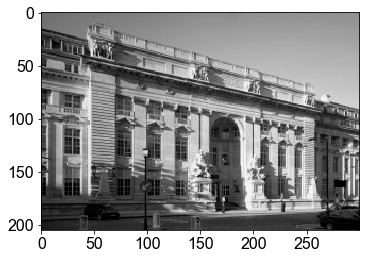

In [3]:
img = plt.imread("RSM-BW-300x205.png")
plt.imshow(img, cmap='gray');

The code to assemble the matrix $\mat A$ is given by:

In [4]:
def K_matrix(Nx, Ny, delta_x=1.0):
    """Assemble discrete Poisson matrix K
    
    Nx, Ny: number of gridpoint in x and y directions
    delta_x: grid distance
    """
    n = Ny * Nx
    K = sp.eye(n)*4  # main diagonal with the value 4
    K -= sp.eye(n, k=1)  # connections to grid point on the right
    K -= sp.eye(n, k=-1)  # connection to the left
    K -= sp.eye(n, k=Nx) # connection to grid point below
    K -= sp.eye(n, k=-Nx)  # connection above
    K = K / (delta_x)**2  # divide all entries by dx^2
        
    return K

def A_matrix(Nx, Ny, m, delta_t=1.0, delta_x=1.0):
    """Assemble discrete timestepping matrix A for diffusion equation
    
    Nx, Ny: number of gridpoint in x and y directions
    m: diffusion coefficient
    delta_t: time step
    delta_x: grid distance
    """
    n = Ny * Nx
    K = K_matrix(Nx, Ny, delta_x)
    A = sp.eye(n) + m * delta_t * K
        
    return A

So that a simple timestepping model takes the form:

In [5]:
def diffusion_model(Nx, Ny, m, u0, Nt, delta_t=1.0, delta_x=1.0):
    """Solve diffusion equation and return solution in final timestep
    
    Nx, Ny: number of gridpoint in x and y directions
    m: diffusion coefficient
    u0: initial condition
    Nt: number of timesteps
    delta_t: time step
    delta_x: grid distance
    """

    A = A_matrix(Nx, Ny, m, delta_t=delta_t, delta_x=delta_x)
    u = u0
    for i in range(Nt):
        u = spl.spsolve(A, u)  # solve using sparse direct solver
    return u

In the rest of this coursework, we simply assume a fixed value for $\Delta x=1$, and also a timestep of $\Delta t=1$. The domain is assumed to be $[0,L]\times [0,H]$ with length $L=N_x\Delta x=N_x$ and height $H=N_y\Delta x=N_y$. The number of timesteps is given by $N_t$, and in the examples kept fixed at $N_t=5$, and we assume that the time $t$ runs between 0 and $T=N_t\Delta t=N_t$.

The code below shows how the diffusion model can be applied to a black and white photo. Note that we need to flatten the `img` array, which has a shape of $N_y\times N_x$, to a flat array `u` with length $n=N_x\cdot N_y$:

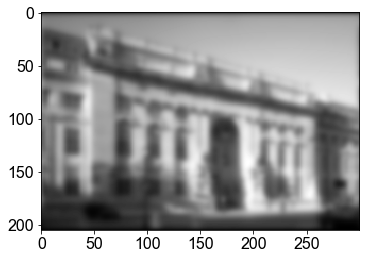

In [6]:
Ny, Nx = img.shape
Nt = 5
m = 1  # what value did we use ???
u0 = img.flatten()
u1 = diffusion_model(Nx, Ny, m, u0, Nt)
img1 = u1.reshape(Ny, Nx)
plt.imshow(img1, cmap='gray')
np.save('rsm-blurred.npy', img1)

In [7]:
Nx
Ny

205

# Question B7

## Inversion for Diffusion Coefficient <a class="tocSkip"/></a>
After applying the diffusion model, we have forgotten what value of the diffusion coefficient $m$ we have used. We do however still have the original photo that was used which served as the initial condition $u_{\text{ic}}$, and the blurred photo obtained from the last timestep value of $u$, which we have stored as $u_{\text{end}}$ (in the file `rsm-blurred.npy`). We therefore consider the following PDE-constrained optimisation problem:

$$
  \text{minimize } f(u, m) = \int \left(u(x, y, T) -u_{\text{end}}(x, y, T)\right)^2 \mathrm{d}x\mathrm{d}y
$$

subject to the PDE constraint:

$$
  g(u,m) = \begin{pmatrix}
    \frac{\partial u(x,y,t)}{\partial t} -m\frac{\partial^2 u(x,y,t)}{\partial x^2} - m\frac{\partial^2 u(x,y,t)}{\partial y^2}  \\
    u(x, y, 0) - u_{\text{ic}}(x, y) \\
    \frac{\partial u(x,y,t)}{\partial x}  \\
    \frac{\partial u(x,y,t)}{\partial y} 
  \end{pmatrix}
  =
  \begin{pmatrix} 
  \phantom{\frac{\partial^2}{\partial x}} 0 \phantom{\frac{\partial^2}{\partial x}} \\
  \phantom{\frac{\partial u}{\partial x}} 0 \phantom{\frac{\partial u}{\partial x}} \\
  \phantom{\frac{\partial u}{\partial x}} 0 \phantom{\frac{\partial u}{\partial x}} \\
  \phantom{\frac{\partial u}{\partial x}} 0 \phantom{\frac{\partial u}{\partial x}} 
  \end{pmatrix}
  \begin{array}{l}
\text{ for } (x,y)\in [0,L]\times[0,H], t \in [0,T] \phantom{\frac{\partial^2}{\partial x}} \\
\text{ for } (x,y)\in [0,L]\times[0,H] \phantom{\frac{\partial u}{\partial x}} \\
    \text{ for } x=0\text{ or x=L, and } y\in [0,H], t \in [0,T] \phantom{\frac{\partial u}{\partial x}} \\
    \text{ for } y=0\text{ or y=H, and } x\in [0,L], t \in [0,T]
  \end{array}
$$

* We decide to use the tangent-linear approach to compute the gradient of the reduced functional. Consider a perturbation $\delta m$ in the diffusion coefficient $m$, show that the resulting perturbation $\delta u(x,y,t)$ to the solution $u(x,y,t)$ satisfies the following PDE:

$$
      \frac{\partial \delta u(x,y,t)}{\partial t} -m\frac{\partial^2 \delta u(x,y,t)}{\partial x^2} - m\frac{\partial^2 \delta u(x,y,t)}{\partial y^2} =
      \delta m\frac{\partial^2 u(x,y,t)}{\partial x^2} + \delta m\frac{\partial^2 u(x,y,t)}{\partial y^2}      
$$

with initial condition

$$
  \delta u(x,y,0) = 0
$$

and boundary conditions

\begin{align*}
    \frac{\partial \delta u(x,y,t)}{\partial x} &= 0 & \text{ for } x=0\text{ or x=L, and } y\in [0,H] \\
    \frac{\partial \delta u(x,y,t)}{\partial y} &= 0 &
    \text{ for } y=0\text{ or y=H, and } x\in [0,L]
\end{align*}

***

### Answer B7

by using tangent line method, we know:

$$
  \delta u = \frac{du}{dm}\delta m
$$

If we substitute the perturbation $\delta u$ to the solution $u$ due to a perturbation $\delta m$ in $m$
the tangent linear equation reads

$$
  \frac{\partial g(u(m), m)}{\partial u} \delta u = - 
  \frac{\partial g(u(m), m)}{\partial m}\delta m
$$

$$
  \frac{\partial g(u(m), m)}{\partial u}\delta u = 
  \begin{pmatrix}  
  \frac{\partial \delta u(x,y,t)}{\partial t} -m\frac{\partial^2 \delta u(x,y,t)}{\partial x^2} - m\frac{\partial^2 \delta u(x,y,t)}{\partial y^2} \\
  \delta u(x, y, 0) \\
  \frac{\partial \delta u(x,y,t)}{\partial x} & \\
  \frac{\partial \delta u(x,y,t)}{\partial y} &
  \end{pmatrix}
$$

and the right-hand side

$$
-\frac{\partial g(u(m), m)}{\partial m}\delta m =
\begin{pmatrix}  
  \delta m\frac{\partial^2 u(x,y,t)}{\partial x^2} + \delta m\frac{\partial^2 u(x,y,t)}{\partial y^2} \\
  0 \\
  0 \\
  0
  \end{pmatrix}
$$

Combined this gives:

$$
      \frac{\partial \delta u(x,y,t)}{\partial t} -m\frac{\partial^2 \delta u(x,y,t)}{\partial x^2} - m\frac{\partial^2 \delta u(x,y,t)}{\partial y^2} =
      \delta m\frac{\partial^2 u(x,y,t)}{\partial x^2} + \delta m\frac{\partial^2 u(x,y,t)}{\partial y^2}      
$$

$$
  \delta u(x,y,0) = 0
$$

\begin{align*}
    \frac{\partial \delta u(x,y,t)}{\partial x} &= 0 & \text{ for } x=0\text{ or x=L, and } y\in [0,H] \\
    \frac{\partial \delta u(x,y,t)}{\partial y} &= 0 &
    \text{ for } y=0\text{ or y=H, and } x\in [0,L]
\end{align*}

which satisfies the answer of the question

# Question B8



Note that the PDE for $\delta u$ is very similar to the PDE for $u$, except for the additional right-hand side term. We can therefore implement it using

$$
  \mat A \vec{\delta u}^{k+1} = \vec{\delta u}^k - \Delta t~\delta m~\mat K\vec u^{k+1}
$$

where $\vec{\delta u}^{k+1}$ and $\vec{\delta u}^k$ are the numerical solutions for $\delta u$ at the end and beginning of the timestep, and $\vec{u}^{k+1}$ is the numerical solution for $u$ at the end of timestep $k$, calculated as before. The code is given by:

In [8]:
def tangent_linear_model(Nx, Ny, kappa, u0, Nt, delta_t=1.0, delta_x=1.0, delta_m=1.0):
    """Solve tangent linear model based on perturbation in diffusion coefficient.
    Return perturbation in final timestep solution
    
    Nx, Ny: number of gridpoint in x and y directions
    u0: initial condition
    Nt: number of timesteps
    delta_t: time step
    delta_x: grid distance
    delta_m: perturbation in diffusion coefficient m. Set to 1 to compute gradient (see explanation below)
    """

    K = K_matrix(Nx, Ny, delta_x=delta_x)
    A = A_matrix(Nx, Ny, kappa, delta_t=delta_t, delta_x=delta_x)
    u = u0
    du = np.zeros_like(u)  # initial condition for perturbation du
    for i in range(Nt):
        u = spl.spsolve(A, u)  # solve u as before
        du = spl.spsolve(A, du-delta_t*delta_m*(K @ u))  # solve perturbation du
    return du

Using the `diffusion_model` code we can compute the solution $\vec u(m)$ for any value  of the diffusion coefficient $m$, and using the `tangent_linear_model` function we can compute the derivative $\mathrm{d}\vec u(m)/\mathrm{d}m$ by setting $\delta m=1$:

$$
  \delta u = \frac{\mathrm{d}\vec u(m)}{\mathrm{d}m} \delta m
$$

In [9]:
img = plt.imread("RSM-BW-300x205.png")
Ny, Nx = img.shape
Nt = 5
u0 = img.flatten()

def u(m):
    """Solve diffusion equation using diffusion coefficient m. 
    Keep all other inputs fixed (Nx, Ny, delta_x=1, Nt=5, etc)"""
    u1 = diffusion_model(Nx, Ny, m, u0, Nt)
    return u1

def dudm(m):
    """Compute gradient of solution u wrt diffusion coefficient m. Keep all other inputs fixed
    Keep all other inputs fixed (Nx, Ny, delta_x=1, Nt=5, etc)"""
    du = tangent_linear_model(Nx, Ny, m, u0, Nt)
    return du

Note that we keep all other inputs, like the initial condition, and the number of timesteps fixed.

* Write a test that verifies that the gradient `dudm` computed using the tangent linear model is correct. You may reuse code from the lecture notes, but be aware that $m$ is just a single scalar and not an array, so you may have to adjust the code.

***

### Answer B8

In [10]:
def taylor_test(f, grad_f, x, h0, max_iter=20, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + O(h^2)
    
    f, grad_f  - function and its derivative to test
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = float(h0)
    residuals = []
    hnorms = []
    for i in range(max_iter):
        r = f(x + h) - f(x) - grad_f(x) * h
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

        # NOTE: slope_marker does not seem to work in semilogy plots
        annotation.slope_marker((1e-3, 1e-4), (2, 1), invert=True, ax=ax[1], size_frac=.2)

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[1.76927688 1.86588305 1.92684034 1.96164725 1.98034289 1.99004606
 1.994991   1.9974874  1.99874167 1.99937033 1.99968505 1.99984254
 1.9999215  1.99996049 1.99998006 1.99999164 2.00004867 1.99995208
 2.00006943]


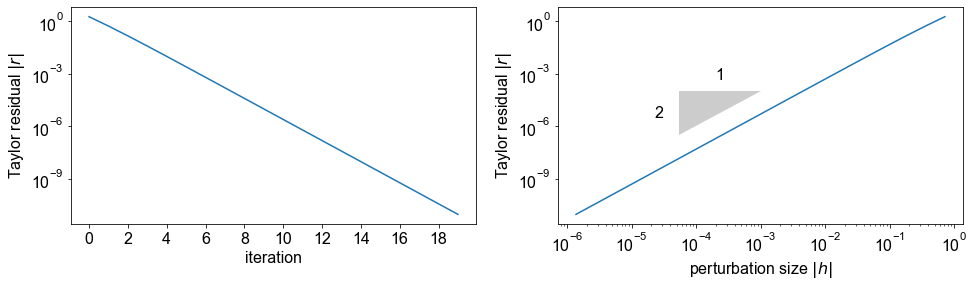

In [11]:
m_val = 1.

h0 = np.random.random(1)

taylor_test(u, dudm, m_val, h0)

# Question B9


The discrete version of the functional is given by:

$$
  f(\vec u) = \left(\vec u - \vec u_{\text{end}}\right)^T \left(\vec u - \vec u_{\text{end}}\right)
$$

and implemented below:

In [12]:
img1 = np.load('rsm-blurred.npy')
u_end = img1.flatten()
print(u_end.size)
def f(u):
    """Functional, return l2norm error (misfit) between final timestep solution u and u_end"""
    return (u-u_end) @ (u-u_end)

61500


we also define a little helper function that computes $f(\vec u(m))$:

In [13]:
def fhat(m):
    """Reduced functional, for given m evaluate the diffusion model to get u(m), and subtitute in functional."""
    return f(u(m))

* Write a python function `dfdm` that computes:
$$
  \frac{\mathrm{d}f(\vec u(m))}{\mathrm{d}m} = \left.\frac{\partial f(\vec u)}{\partial\vec u}\right|_{\vec u=\vec u(m)}\cdot\frac{\mathrm{d}\vec u}{\mathrm{d}m}
$$
Write a test that verifies the gradient is correct.

***

### Answer B9

In [14]:
def dfdm(m):
    du = dudm(m)

    dfdu = 2 * np.subtract(u(m), u_end)
    
    return dfdu @ du

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[1.60633386 1.76589917 1.8700931  1.93115706 1.96449808 1.98196346
 1.99090826 1.99543549 1.99771305 1.99885535 1.99942738 1.99971362
 1.99985679 1.99992839 1.99996419 1.9999821  1.99999105 1.99999552
 1.99999776]


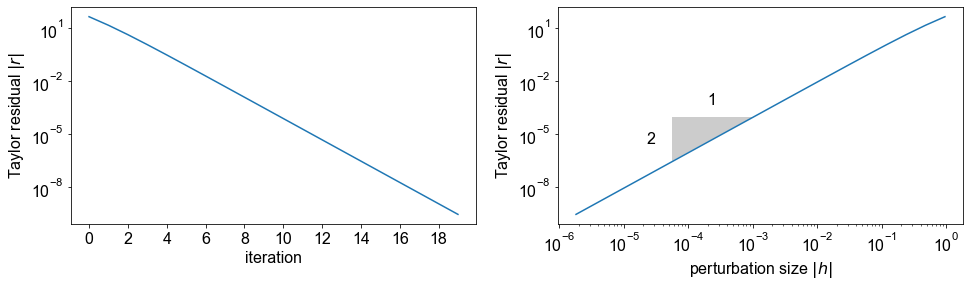

In [15]:
m_val = 1.

h0 = np.random.random(1)

taylor_test(fhat, dfdm, m_val, h0)

# Question B10

We decide to use the following minimisation algorithm:

In [16]:
def optimize(dfdm, m0):
    """Algorithm to find stationary point for f(m) by solving df(m)/dm=0
    
    dfdm: a function that returns the gradient of f
    m0: initial guess"""
    
    m_i = m0
    for i in range(100):  # fixed number of maximum iterations
        gradf_i = dfdm(m_i)
        # stopping criterion
        if abs(gradf_i) < 1e-5:
            break
        
        if i>0:
            # approximate the second derivative:
            hess = (gradf_i - gradf_prev) / (m_i - m_prev)
        else:
            # first step: no good approximation, but value should be
            # large enough to ensure the initial step is small
            hess = 100.
        
        # store previous values:
        gradf_prev = gradf_i
        m_prev = m_i
            
        # update step:
        m_i = m_prev - gradf_i/hess
        print('Iteration {}, value: {}'.format(i, m_i))
    else:
        print('Maximum number of iterations reached!')
        
    return m_i

In [17]:
optimize(dfdm, 1.5)

Iteration 0, value: 0.9764761703565248
Iteration 1, value: 1.016521209649102
Iteration 2, value: 1.0004955137576745
Iteration 3, value: 0.9999895064354897
Iteration 4, value: 1.0000000066411132


1.0000000066411132

* What is the specific name of the algorithm above, a variant of the Newton method? Why can we not use the standard Newton method? Use the above code to find the value of $m$ that was used to blur the photo. You will find that your initial guess needs to be roughly between 1 and 5. The algorithm does not converge for many values outside that range. Is this to be expected, and how could we improve it? (You do not need to actually implement this improvement)

### Answer B10

m = 1.0000000066411132, which is apprximately equal to the m value I set in above code

* Quasi-Newton method

* the reason why wo cannot apply standard Newton method:

1.In standard Newton method, it is not generally possible to tell _how close_ the starting point needs to be to ensure this quadratic convergence . But Quasi-Newton method modify the Hessian (and thus modify the exact Newton method) is to improve the *global convergence* properties

2.the calculation of the exact Jacobian can be very costly

3.The big advantage of all quasi-Newton methods over full Newton methods, is the fact that no Hessian (optimisation) or Jacobian (root-finding) information needs to be calculated. In addition, as can be read below, the simple way the approximate Hessian is updated, means that we can also construct the inverse of the approximate Hessian, which means that we can avoid having to do a linear solve to establish the new search direction.

* improvement:

1.trust region method:

One can therefore interpret the Newton trust region method as a modification to the Hessian (by the addition of $\mu\mat I$) to ensure that the modified Hessian is SPD, which guaranteed the new direction s a descent direction. So it improves global convergence

2.Truncated method can improve robutness

# Question B11

## Variable Diffusion Coefficient <a class="tocSkip"></a>
To apply a blur effect that varies throughout the photo, we consider a spatially varying diffusion coefficient $m(x,t)$

$$
  \frac{\partial u(x,y,t)}{\partial t} - m(x,t) \frac{\partial^2 u(x,y,t)}{\partial x^2} - m\frac{\partial^2 u(x,y,t)}{\partial y^2} = 0
$$

or in discretised form:
    
$$ 
\frac{u_i^{k+1} - u_i^k}{\Delta t} +
m_i\frac{-u_{i-1}^{k+1} + 2u_{i}^{k+1} -u_{i+1}^{k+1}}{\Delta x^2} + m_i\frac{-u_{i-N_x}^{k+1} + 2u_{i}^{k+1} - u_{i+N_x}^{k+1}}{\Delta y^2} = 0 $$

where $m_i$ are the entries of a vector $\vec m$ storing the different values of the diffusion coefficient at the grid points.

Again, we can write this as a linear system

$$
  \mat A \vec u^{k+1} = \vec u^k
$$

where now

$$
  \mat A = \mat I + \Delta t~\mat{diag}(\vec m)~\mat K
$$

with $\mat{diag}(\vec m)$ the diagonal matrix whose only nonzero entries are along the main diagonal, and are given by the entries of $\vec m$.

The implementation is given below:

### Answer B11

we know I is a symmetric matrix,

so we are going to discuss the remained part of $\mat A$

if the elements in $\vec m$ are not the same, so we get:

$$
~\mat{diag}(\vec m)~\mat K \neq ~\mat K~\mat{diag}(\vec m)
$$

which means $\mat A^T \neq \mat A$, so $\mat A$ is not a  symmetric matrix

In [18]:
def A_matrix(Nx, Ny, m, delta_t=1.0, delta_x=1.0):
    """Assemble discrete timestepping matrix A for diffusion equation
    with variable diffusion
    
    Nx, Ny: number of gridpoint in x and y directions
    m: diffusion coefficient in all gridpoints, array of length Nx*Ny
    delta_t: time step
    delta_x: grid distance
    """

    n = Ny * Nx
    K = K_matrix(Nx, Ny, delta_x)
    A = sp.eye(n) + delta_t * sp.diags(m) @  K
        
    return A

* Show that the matrix $\mat A$ is *not* symmetric (either by mathematical proof or by experiment), assuming the values of $\vec m$ are not all the same.

### Answer B11

In [19]:
M = np.random.random(Nx*Ny)

A = A_matrix(Nx, Ny, M)

rows, cols = A.shape
condition = False
for i in range(rows):
    for j in range(cols):
        if i <= j:
            continue
        if A[i,j] != A[j,i]:
            print("this is not a symmetric matrix")
            condition = True
            break
    if condition:
        break

if not condition:
    print("this is not a symmetric matrix")

this is not a symmetric matrix


# Question B12

We now need to redefine the `diffusion_model` based on the new `A_matrix`. This code works exactly as before, except we now return not just the solution at the last timestep, but also all inbetween solutions in a list:

In [20]:
def diffusion_model(Nx, Ny, m, u0, Nt, delta_t=1.0, delta_x=1.0):
    """Solve diffusion equation with variable diffusion,
    and return the solution in all timesteps
    
    Nx, Ny: number of gridpoint in x and y directions
    m: diffusion coefficient in all gridpoints, array of length Nx*Ny
    u0: initial condition
    Nt: number of timesteps
    delta_t: time step
    delta_x: grid distance
    """

    A = A_matrix(Nx, Ny, m, delta_t=delta_t, delta_x=delta_x)
    u = []
    ui = u0
    for i in range(Nt):
        ui = spl.spsolve(A, ui)
        u.append(ui)
    return u

We use the model on a different photo, and run the model to apply the blurring effect.

[0.95702774 0.95587101 0.95467956 ... 0.95305033 0.95429851 0.9555098 ]


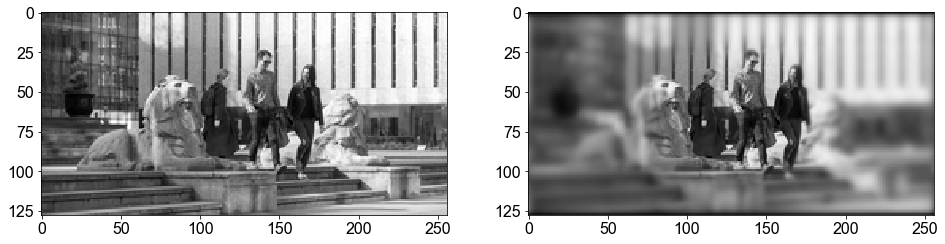

In [21]:
# read the input image, which forms the initial condition u_ic:
img = plt.imread('queens.png')
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(img, cmap='gray')

# This sets up the  spatially varying diffusion coefficient in an array m
# that increases towards the boundaries
# However, after this cell we will "forget" what m was, and try to retreive it
# by solving the optimisation problem described further below
Ny, Nx = img.shape
x, y = np.meshgrid(np.arange(Nx), np.arange(Ny))
x0 = Nx/2.; y0 = Ny/2.
m_grid = np.exp(-1/100./(((x-x0)/Nx/0.75)**4+((y-y0)/Ny/1.2)**4+1e-10))
m = m_grid.flatten()
print(m)
# apply the filter based on this vector m:
u0 = img.flatten()
u = diffusion_model(Nx, Ny, m, u0, 5)

# plot the resulting image, and store it in a file to be used as u_end later
img1 = u[-1].reshape(img.shape)  # image based on the final timestep solution u[-1]
np.save('queens-blurred.npy', img1)
ax[1].imshow(img1, cmap='gray');

After applying the filter, again we have lost the vector of diffusion coefficients $\vec m$. Like before, we would like to recover these values using a PDE-constrained optimisation problem using the same functional $f(u, m)$ as before. This time we formulate it as a *discrete optimisation problem*:

$$
  \text{minimize } f(\vec u, \vec m) = \left(\vec u^{N_t}-\vec u_{\text{end}}\right)^T \left(\vec u^{N_t}-\vec u_{\text{end}}\right)
$$

subject to the discrete PDE constraint

$$
g(\vec u, \vec m) = 
\begin{pmatrix}
\mat A & 0 & 0 & 0 & \cdots & 0\\
-\mat I & \mat A & 0 & 0 &\cdots & 0\\
0 & -\mat I & \mat A & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \cdots & 0 \\
0 & 0 & \cdots & -\mat I & \mat A & 0\\
0 & 0 & \cdots &0 & -\mat I & \mat A
\end{pmatrix}
\begin{pmatrix}
  \vec u^1 \\
  \vec u^2 \\
  \vec u^3 \\
  \vdots \\
  \vec u^{N_t-1} \\
  \vec u^{N_t}
\end{pmatrix}
-
\begin{pmatrix}
  \vec u_{\text{ic}} \\
  0 \\
  0 \\
  \vdots \\
  \phantom{^{N}} 0 \phantom{^{N}} \\
  \phantom{^{N}} 0 \phantom{^{N}}
\end{pmatrix}
=
\begin{pmatrix}
  0 \\
  0 \\
  0 \\
  \vdots \\
  \phantom{^{N}} 0 \phantom{^{N}} \\
  \phantom{^{N}} 0 \phantom{^{N}}
\end{pmatrix}  
$$

Here the vector $\vec u$ represents the entire discrete solution at all timesteps, and therefore has a length of $N_t\cdot N_x \cdot N_y$, and is composed of (sub)-vectors $\vec u^k$ for the solution at time-step $k$. The above matrix system thus describes the same timestepping sequence as we implemented above in `diffusion_model`:

$$
  \mat A\vec u^1 = \vec u_{\text{ic}} \\
  -\mat I\vec u^1 + \mat A\vec u^2 = 0  \implies  A\vec u^2 = \vec u^1 \\
  \vdots \\
  -\mat I\vec u^{N_t-1} + \mat A\vec u^{N_t} = 0  \implies  A\vec u^{N_t} = \vec u^{N_t-1}
$$

* We decide to solve this optimisation problem using a gradient-based optimisation algorithm, where the gradient is computed using the adjoint technique. Why can we not use the tangent linear approach as before (efficiently)? What are the three steps we need to take to compute this gradient?

### Answer B12

in this model, the parameter is a vector with many elements. But the tangent linear method is useful for cases with a small number of parameters, and a potentially large number of functionals.

so we choose to apply adjoint technique.

Three step:

1. Solve the PDE constraint $g(u, m)=0$ to obtain $u=u(m)$

2. Solve the adjoint equation using $m$ and $u(m)$ for $\lambda$, such that $\frac{\partial\mathcal{L}(u, m, \lambda)}{\partial u}=0$

3. The derivative of the reduced functional is now given by

$$
  \frac{d\hat f(m)}{dm} = \frac{\partial\mathcal{L}(u, m, \lambda)}{\partial m} = \frac{\partial f(u,m)}{\partial m} - \lambda\cdot \frac{\partial g(u, m)}{\partial m}
$$

# Question B13

* Derive the (discrete) adjoint equation for this problem. Work out how the resulting linear system can be solved timestep by timestep. In what order are the timesteps best solved?

### Answer B13

Like before, we would like to recover these values using a PDE-constrained optimisation problem using the same functional $f(u, m)$ as before. This time we formulate it as a *discrete optimisation problem*:

$$
  \text{minimize } f(\vec u, \vec m) = \left(\vec u^{N_t}-\vec u_{\text{end}}\right)^T \left(\vec u^{N_t}-\vec u_{\text{end}}\right)
$$

subject to the discrete PDE constraint

$$
g(\vec u, \vec m) = 
\begin{pmatrix}
\mat A & 0 & 0 & 0 & \cdots & 0\\
-\mat I & \mat A & 0 & 0 &\cdots & 0\\
0 & -\mat I & \mat A & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \cdots & 0 \\
0 & 0 & \cdots & -\mat I & \mat A & 0\\
0 & 0 & \cdots &0 & -\mat I & \mat A
\end{pmatrix}
\begin{pmatrix}
  \vec u^1 \\
  \vec u^2 \\
  \vec u^3 \\
  \vdots \\
  \vec u^{N_t-1} \\
  \vec u^{N_t}
\end{pmatrix}
-
\begin{pmatrix}
  \vec u_{\text{ic}} \\
  0 \\
  0 \\
  \vdots \\
  \phantom{^{N}} 0 \phantom{^{N}} \\
  \phantom{^{N}} 0 \phantom{^{N}}
\end{pmatrix}
=
\begin{pmatrix}
  0 \\
  0 \\
  0 \\
  \vdots \\
  \phantom{^{N}} 0 \phantom{^{N}} \\
  \phantom{^{N}} 0 \phantom{^{N}}
\end{pmatrix}  
$$

Here the vector $\vec u$ represents the entire discrete solution at all timesteps, and therefore has a length of $N_t\cdot N_x \cdot N_y$, and is composed of (sub)-vectors $\vec u^k$ for the solution at time-step $k$.

For simplicity's sake let us assume that the numerical model that corresponds to $g(u, m)=0$ is linear.
As we have seen in the discretised 1D advection example, the structure of 
our model looks like

$$
  \frac{\partial g(u, m)}{\partial u} =
  \begin{pmatrix}
\mat A & 0 & 0 & 0 & \cdots & 0\\
-\mat I & \mat A & 0 & 0 &\cdots & 0\\
0 & -\mat I & \mat A & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \cdots & 0 \\
0 & 0 & \cdots & -\mat I & \mat A & 0\\
0 & 0 & \cdots &0 & -\mat I & \mat A
\end{pmatrix}
$$

The adjoint equation gives rise to a linear system of the following form

$$
  \begin{pmatrix}
\mat A^T & -\mat I & 0 & 0 & \cdots & 0\\
0 & \mat A^T & -\mat I & 0 &\cdots & 0\\
0 & 0 & \mat A^T & -\mat I & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \cdots & 0 \\
0 & 0 & \cdots & 0 & \mat A^T & -\mat I\\
0 & 0 & \cdots &0 & 0 & \mat A^T
\end{pmatrix}
  \begin{pmatrix}
    \vlam^1 \\ \vlam^2 \\ \vlam^3 \\ \vdots \\ \vlam^{N_t-1} \\ \vlam^{N_t}
  \end{pmatrix}
=
  \begin{pmatrix}
    \frac{\partial f}{\partial \vec u^1} \\ 
    \frac{\partial f}{\partial \vec u^2} \\ 
    \frac{\partial f}{\partial \vec u^3} \\ 
    \vdots \\
    \frac{\partial f}{\partial \vec u^{N_t-1}} \\ 
    \frac{\partial f}{\partial \vec u^{N_t}} \\ 
  \end{pmatrix}
$$

Note that the natural way to solve this system is to actually go backwards through the time levels, i.e. first we solve the last row:

$$
  \mat A^T \vlam^{N_t} = \frac{\partial f}{\partial \vec u^{N_t}},
$$

then using $\vlam^{N_t}$, we solve for $\vlam^{N_t-1}$

$$
  \mat A^T \vlam^{N_t-1} - \vlam^{N_t} = \frac{\partial f}{\partial \vec u^{N_t-1}},
$$

etc.

So the order of the best solved is backward timestep

# Question B14

We provide you with following code, implementing the backward model (which you should be able to relate to your previous answer):

In [22]:
def backward_model(Nx, Ny, m, Nt, u_Nt):
    """Solve adjoint equation and return the adjoint solution in all timesteps
    
    Nx, Ny: number of gridpoint in x and y directions
    m: diffusion coefficient in all gridpoints, array of length Nx*Ny
    u_Nt: forward solution in last timestep
    """
    A = A_matrix(Nx, Ny, m)
    lam = 2*(u_Nt - u_end)  # right-hand side in last time step
    
    # first collect solutions in reverse order:
    lambdas = []  
    for i in range(Nt):
        lam = spl.spsolve(A.T, lam)
        lambdas.append(lam)
        
    
    # then reverse the list, so that the returned list is in the correct order
    return lambdas[::-1]

Again, we define

$$
  \hat f(\vec m) = f(\vec u(\vec m), \vec m)
$$

where $\vec u(\vec m)$ is the "forward" solution to the discretised PDE $g(\vec u,\vec m)=0$. This is implemented below:

In [23]:
img1 = np.load('queens-blurred.npy')
Ny, Nx = img1.shape
Nt = 5
u_end = img1.flatten()

def f(u_Nt):
    """Functional based on final-timestep forward solution"""
    return (u_Nt-u_end) @ (u_Nt-u_end)

def fhat(m):
    """Reduced functional: compute forward solution for given array of grid-point diffusion coefficients
    and subtitute into functional"""
    u = diffusion_model(Nx, Ny, m, u0, Nt)
    fu = f(u[-1])
    print('f(u(m)): ', fu)
    return fu

* Implement the derivative $\mathrm{d}\hat f(\vec m)/\mathrm{d}\vec m$ in a python function `dfdm`. As always, test your derivative: i.e. write a test that verifies that `dfdm` is a derivative of `fhat` above.

**Hint**:
You may use the following expression:

\begin{align*}
  \left(\vlam^T \frac{\partial g(\vec u, \vec m)}{\partial\vec m}\right)_i
  =\sum_{k=1}^{N_t} \Delta t\lambda^k_i \left(\mat K\vec u^k\right)_i
\end{align*}

where $\lambda^k_i$ is the $i$ entry of the adjoint solution $\vlam^k$ at timestep $k$ (the $i$th entry in the $k$th array of the list of arrays returned by `backward_model`). Note that there is no summation over $i$ in the last expression: the shape of the matrix $\partial g/\partial\vec m$ is $(Nt\cdot n)\times n$, so $\vlam^T \partial g/\partial\vec m$ is a $n$-vector whose $i$-th entry is given above. Similarly $(\mat K\vec u^k)_i$ means the $i$-th entry of the vector given by the matrix-vector multiplication $\mat K\vec u^k$ where $\vec u^k$ is the solution in the $k$-th timestep (returned as a list of arrays by `diffusion_model`).

In [24]:
def dfdm(m):
    K = K_matrix(Nx, Ny)
    A = A_matrix(Nx, Ny, m)
    delta_t = 1
    u_nt = diffusion_model(Nx, Ny, m, u0, Nt)[-1]
    lambdas = backward_model(Nx, Ny, m, Nt, u_nt)[::-1]

# because f is a function about u, so dfdm is equal to 0

# compute lambdas * dgdm
    u = u_end

    result_dgdm = 0.0
    for i in range(Nt):
        dg_m = delta_t * lambdas[i] @ (K @ u)
        u = A @ u
        result_dgdm += dg_m

    return result_dgdm

In [25]:
def taylor_test(f, grad_f, x, h0, max_iter=20, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + O(h^2)
    
    f, grad_f  - function and its derivative to test
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = h0.copy()
    residuals = []
    hnorms = []
    for i in range(max_iter):
        r = f(x + h) - f(x) - np.sum(grad_f(x) * h)
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

        # NOTE: slope_marker does not seem to work in semilogy plots
        annotation.slope_marker((2e-2, 2e-3), (2, 1), invert=True, ax=ax[1], size_frac=.2)

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

f(u(m)):  79.99216863043866
f(u(m)):  0.0
f(u(m)):  45.938951283784974
f(u(m)):  0.0
f(u(m)):  24.778482868808513
f(u(m)):  0.0
f(u(m)):  11.91572622734508
f(u(m)):  0.0
f(u(m)):  4.8823653053030105
f(u(m)):  0.0
f(u(m)):  1.6950854456674558
f(u(m)):  0.0
f(u(m)):  0.5153912696810459
f(u(m)):  0.0
f(u(m)):  0.14355520176587713
f(u(m)):  0.0
f(u(m)):  0.03799358015805814
f(u(m)):  0.0
f(u(m)):  0.00978072315116862
f(u(m)):  0.0
f(u(m)):  0.00248176706752512
f(u(m)):  0.0
f(u(m)):  0.0006250991506680132
f(u(m)):  0.0
f(u(m)):  0.00015686231891598085
f(u(m)):  0.0
f(u(m)):  3.92893592800521e-05
f(u(m)):  0.0
f(u(m)):  9.831583500580544e-06
f(u(m)):  0.0
f(u(m)):  2.4590526657353313e-06
f(u(m)):  0.0
f(u(m)):  6.149078485158216e-07
f(u(m)):  0.0
f(u(m)):  1.5374505259685558e-07
f(u(m)):  0.0
f(u(m)):  3.843852478285048e-08
f(u(m)):  0.0
f(u(m)):  9.609913920256587e-09
f(u(m)):  0.0
Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[0.80014084 0.89063007 1.05622098 1.28721473 1.52622225 

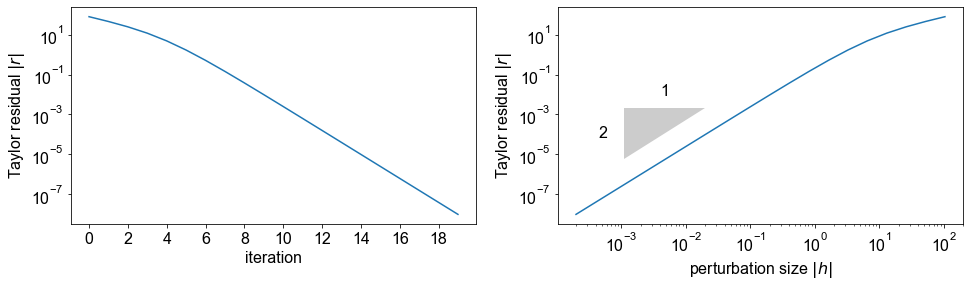

In [26]:
h0 = np.random.random(m.shape)

taylor_test(fhat, dfdm, m, h0)